# **Project 1 - Ensemble Learning**

# **Data Description:**   
##The data is related with direct marketing campaigns of a  Portuguese banking institution. The marketing campaigns  were based on phone calls. Often, more than one contact to  the same client was required, in order to access if the product  (bank term deposit) would be ('yes') or not ('no') subscribed.   

# **Domain:**   
 ## Banking  

# **Context:**  
##Leveraging customer information is paramount for most  businesses. In the case of a bank, attributes of customers like  the ones mentioned below can be crucial in strategizing a  marketing campaign when launching a new product.  

## **Attribute Information:** 

* age (numeric)  
* job : type of job (categorical:  'admin.','blue-collar','entrepreneur','housemaid','manage ment','retired','self-employed','services','student','technicia n','unemployed','unknown')  
* marital : marital status (categorical:  'divorced','married','single','unknown'; note: 'divorced'  means divorced or widowed)  
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','profes sional.course','university.degree','unknown') 
* default: has credit in default? (categorical:  'no','yes','unknown')  
* balance: average yearly balance, in euros (numeric)  
* housing: has housing loan? (categorical:  'no','yes','unknown')  
* loan: has personal loan? (categorical: 'no','yes','unknown')  
* contact: contact communication type (categorical:  'cellular','telephone')  
* day: last contact day of the month (numeric 1 -31)  
* month: last contact month of year (categorical: 'jan', 'feb',  'mar', ..., 'nov', 'dec')  
*  duration: last contact duration, in seconds (numeric).  Important note: this attribute highly affects the output  target (e.g., if duration=0 then y='no'). Yet, the duration is  not known before a call is performed. Also, after the end  of the call y is obviously known. Thus, this input should  only be included for benchmark purposes and should be  discarded if the intention is to have a realistic predictive  model.  
*  campaign: number of contacts performed during this  campaign and for this client (numeric, includes last  contact)  
*  pdays: number of days that passed by after the client  was last contacted from a previous campaign (numeric;  999 means client was not previously contacted)  
* previous: number of contacts performed before this  campaign and for this client (numeric)  
*  poutcome: outcome of the previous marketing  campaign (categorical: 'failure','nonexistent','success')  
* target: has the client subscribed a term deposit? (binary:  "yes","no") 


# **Objective**
## **The classification goal is to predict if the client will subscribe  (yes/no) a term deposit (variable y).**  

# **Learning Outcomes:**  
## * Exploratory Data Analysis  
## * Preparing the data to train a model  
## * Training and making predictions using an Ensemble  Model  
## * Tuning an Ensemble model    


**Importing all the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,roc_auc_score

from google.colab import files
import io


**Importing the Dataset to Notebook.**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AIML/bank-full - Govindaraj V.csv'
data = pd.read_csv(path)

In [ ]:
data.head() #Looking for 1st 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.tail() #Looking for last 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
data.shape #looking for the shape of the dataset

(45211, 17)

**Performing Exploratory Data Analysis**

In [ ]:
data.dtypes.to_frame('Data Types')

,Data Types
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Checking for missing values**

In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


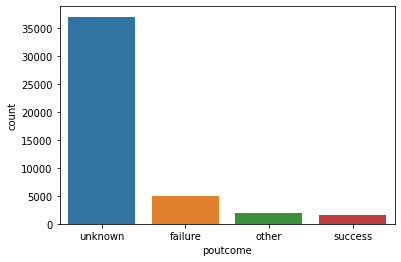

In [ ]:
sns.countplot(data['poutcome'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


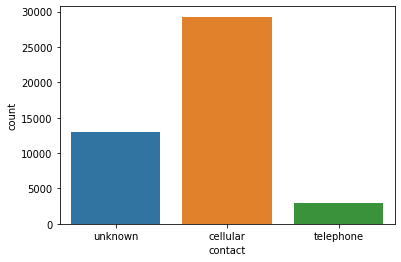

In [ ]:
sns.countplot(data['contact'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


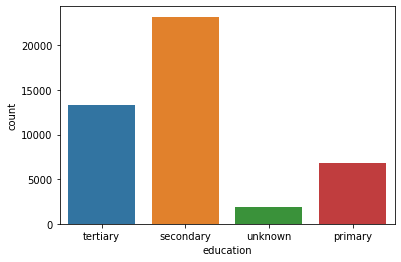

In [ ]:
sns.countplot(data['education'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


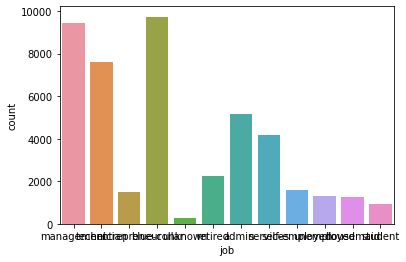

In [ ]:
sns.countplot(data['job'])

In [ ]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# **5 Point Summary understanding**

1. Outliers are present in age,balance,duration,campaign,pdays,previous columns

2. balance,duration,campaign,pdays,previous are right skewed
 

# **Distribution of Numerical features**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

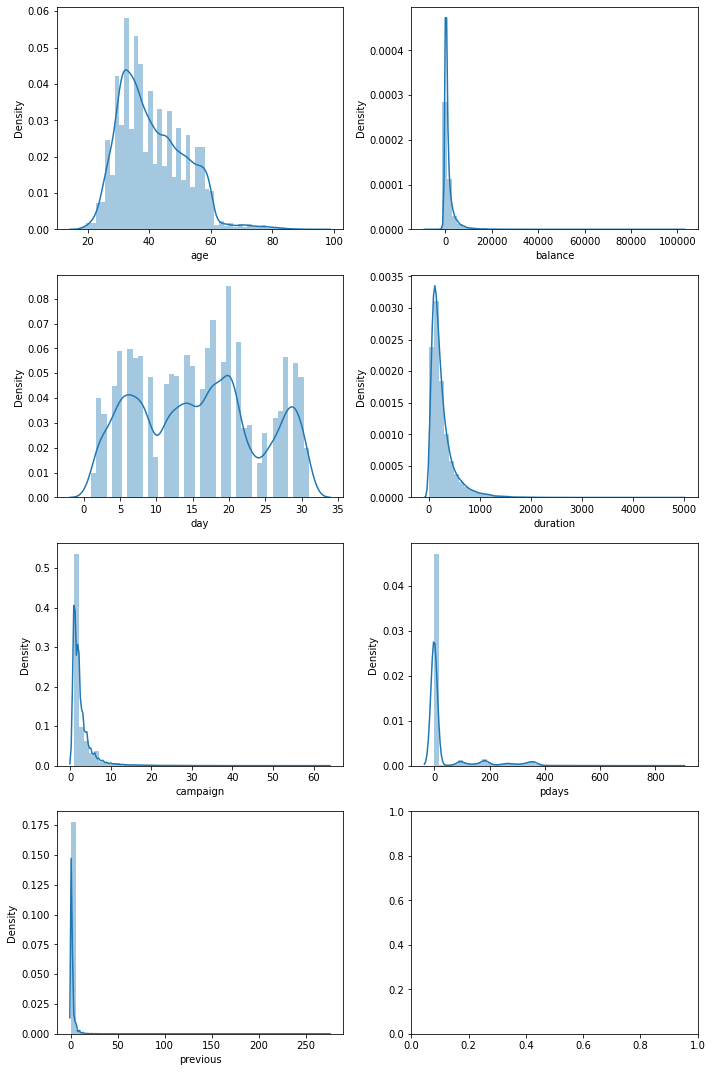

In [ ]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,15))
axe=axe.flatten()
sns.distplot(data['age'],ax=axe[0])
sns.distplot(data['balance'],ax=axe[1])
sns.distplot(data['day'],ax=axe[2])
sns.distplot(data['duration'],ax=axe[3])
sns.distplot(data['campaign'],ax=axe[4])
sns.distplot(data['pdays'],ax=axe[5])
sns.distplot(data['previous'],ax=axe[6])

fig.tight_layout()
fig.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Distribution of Categorical features**

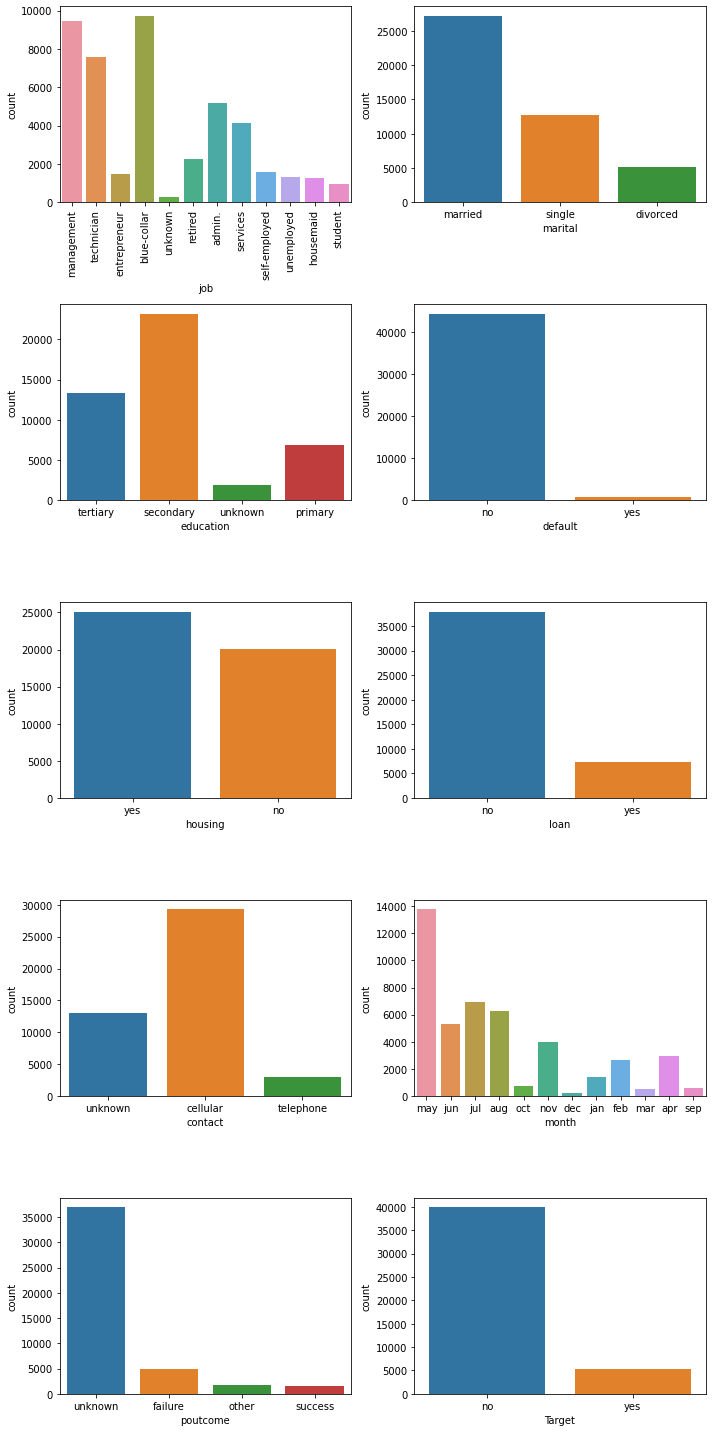

In [ ]:
fig,axe=plt.subplots(nrows=5,ncols=2,figsize=(10,20))
axe=axe.flatten()
plot=sns.countplot(x=data['job'],data=data,ax=axe[0])
plt.setp(plot.get_xticklabels(),rotation=90)
sns.countplot(x=data['marital'],data=data,ax=axe[1])

sns.countplot(x=data['education'],data=data,ax=axe[2])
sns.countplot(x=data['default'],data=data,ax=axe[3])
sns.countplot(x=data['housing'],data=data,ax=axe[4])
sns.countplot(x=data['loan'],data=data,ax=axe[5])
sns.countplot(x=data['contact'],data=data,ax=axe[6])
sns.countplot(x=data['month'],data=data,ax=axe[7])
sns.countplot(x=data['poutcome'],data=data,ax=axe[8])
sns.countplot(x=data['Target'],data=data,ax=axe[9])

fig.tight_layout()
fig.show()

# **Measure the skewness of numerical feature**

In [ ]:
data.skew().to_frame('Skewness').T

,age,balance,day,duration,campaign,pdays,previous
Skewness,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# **Checking the Outliers**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


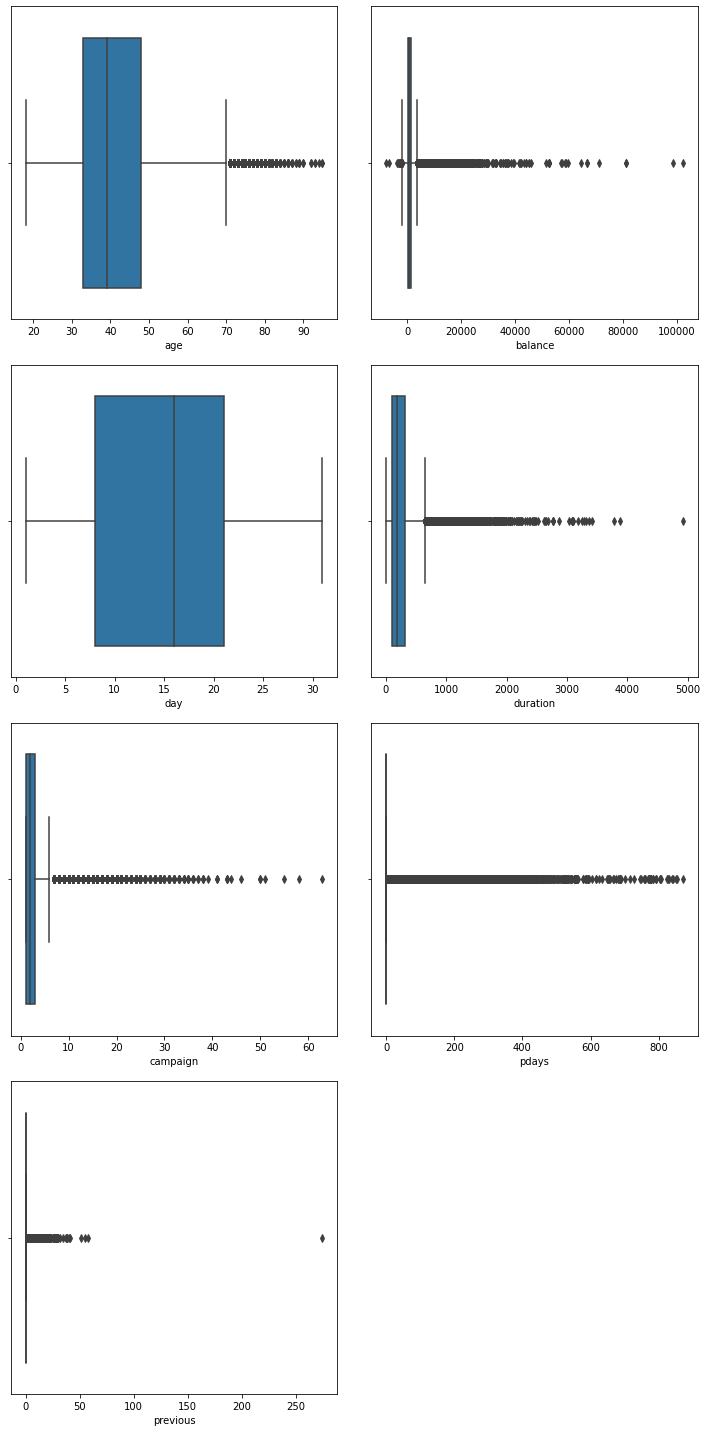

In [ ]:
fig,axe=plt.subplots(nrows=4,ncols=2,figsize=(10,20))
axe=axe.flatten()
sns.boxplot(x='age',data=data,ax=axe[0])
sns.boxplot(x='balance',data=data,ax=axe[1])
sns.boxplot(x='day',data=data,ax=axe[2])
sns.boxplot(x='duration',data=data,ax=axe[3])
sns.boxplot(x='campaign',data=data,ax=axe[4])
sns.boxplot(x='pdays',data=data,ax=axe[5])
sns.boxplot(data['previous'],ax=axe[6])
fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

# **Label Encoding for string feature**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df=data.copy()
encoder=LabelEncoder()

df['default']=encoder.fit_transform(df['default']).astype('int')

df['marital']=encoder.fit_transform(df['marital']).astype('int')
df['loan']=encoder.fit_transform(df['loan']).astype('int')
df['housing']=encoder.fit_transform(df['housing']).astype('int')
df['Target']=encoder.fit_transform(df['Target']).astype('int')
df['month']=encoder.fit_transform(df['month']).astype('int')
df['poutcome']=encoder.fit_transform(df['poutcome']).astype('int')
df['education']=encoder.fit_transform(df['education']).astype('int')

df['job']=encoder.fit_transform(df['job']).astype('int')
df['contact']=encoder.fit_transform(df['contact']).astype('int')


df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [ ]:
df['job']=encoder.fit_transform(df['job']).astype('int')
df['contact']=encoder.fit_transform(df['contact']).astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


# **Build the Base classification ML Model**

In [ ]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0


In [ ]:
x=df.drop('Target',axis=1)
y=df['Target']

In [ ]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


# **Split the Records**

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=3)

# **Scale the data**

In [ ]:
scaler=StandardScaler()
xtrain_scaled=scaler.fit_transform(xtrain)
xtest_scaled=scaler.fit_transform(xtest)

# **Logistic Regression Model**

In [ ]:
log_reg=LogisticRegression(solver='liblinear')
log_reg.fit(xtrain,ytrain)
ypred=log_reg.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred))
print('\n The Classification Report \n',classification_report(ytest,ypred))


The Accuracy score
 0.8923621350634031

 The Confusion matrix 
 [[11751   218]
 [ 1242   353]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.62      0.22      0.33      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



# **Naive Bayes**

In [ ]:
naive=GaussianNB()
naive.fit(xtrain,ytrain)
ypred_naive=naive.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_naive))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_naive))
print('\n The Classification Report \n',classification_report(ytest,ypred_naive))


The Accuracy score
 0.8452521380123857

 The Confusion matrix 
 [[10732  1237]
 [  862   733]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     11969
           1       0.37      0.46      0.41      1595

    accuracy                           0.85     13564
   macro avg       0.65      0.68      0.66     13564
weighted avg       0.86      0.85      0.85     13564



# **SVC**

In [ ]:
svc=SVC()
svc.fit(xtrain,ytrain)
ypred_svc=svc.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_svc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_svc))
print('\n The Classification Report \n',classification_report(ytest,ypred_svc))


The Accuracy score
 0.8827042170451195

 The Confusion matrix 
 [[11965     4]
 [ 1587     8]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.67      0.01      0.01      1595

    accuracy                           0.88     13564
   macro avg       0.77      0.50      0.47     13564
weighted avg       0.86      0.88      0.83     13564



# **Decision Tree Classifier**


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
ypred_dtree=dtree.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_dtree))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_dtree))
print('\n The Classification Report \n',classification_report(ytest,ypred_dtree))


The Accuracy score
 0.8724565025066352

 The Confusion matrix 
 [[11071   898]
 [  832   763]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     11969
           1       0.46      0.48      0.47      1595

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.87      0.87      0.87     13564



# **Ensemble Techniques**

# **1. Bagging Classifier**

In [ ]:
bagc=BaggingClassifier(base_estimator=dtree,n_estimators=200,random_state=1)
bagc.fit(xtrain,ytrain)
ypred_bagc=bagc.predict(xtest)
print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_bagc))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_bagc))
print('\n The Classification Report \n',classification_report(ytest,ypred_bagc))


The Accuracy score
 0.9059274550280153

 The Confusion matrix 
 [[11538   431]
 [  845   750]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     11969
           1       0.64      0.47      0.54      1595

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564



# **Randomforest**

In [ ]:
randf=RandomForestClassifier(n_estimators=200,random_state=2,max_features=4)
randf.fit(xtrain,ytrain)
ypred_rand=randf.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_rand))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_rand))
print('\n The Classification Report \n',classification_report(ytest,ypred_rand))


The Accuracy score
 0.9071070480684164

 The Confusion matrix 
 [[11613   356]
 [  904   691]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11969
           1       0.66      0.43      0.52      1595

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.74     13564
weighted avg       0.90      0.91      0.90     13564



# **Adaboost**

In [ ]:
adab=AdaBoostClassifier(n_estimators=200,random_state=2)
adab.fit(xtrain,ytrain)
ypred_ada=adab.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_ada))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_ada))
print('\n The Classification Report \n',classification_report(ytest,ypred_ada))


The Accuracy score
 0.9019463285166618

 The Confusion matrix 
 [[11636   333]
 [  997   598]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.37      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



# **Gradient Boosting**

In [ ]:
gb=GradientBoostingClassifier(n_estimators=200,random_state=2)
gb.fit(xtrain,ytrain)
ypred_gb=gb.predict(xtest)

print('\nThe Accuracy score\n',accuracy_score(ytest,ypred_gb))
print('\n The Confusion matrix \n',confusion_matrix(ytest,ypred_gb))
print('\n The Classification Report \n',classification_report(ytest,ypred_gb))


The Accuracy score
 0.9048215865526393

 The Confusion matrix 
 [[11628   341]
 [  950   645]]

 The Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.65      0.40      0.50      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

